# Data on testing for COVID-19 by week and country

Las cifras que se muestran para la tasa de pruebas semanales por cada 100 000 habitantes y la positividad de las pruebas semanales (%) se basan en varias fuentes de datos.

El número de casos semanales por utilizado para estimar la positividad de la prueba semanal por país o región subnacional se basa en los datos recopilados por ECDC Epidemic Intelligence. Las fuentes de información son Ministerios de Salud o Institutos Nacionales de Salud Pública (sitios web, cuentas oficiales de twitter o cuentas oficiales de Facebook), y los datos obtenidos se cotejan sistemáticamente con datos de OMS. Hay más información disponible en [este enlace](https://www.ecdc.europa.eu/en/covid-19/data-collection).

La fuente principal del total de pruebas por país o región subnacional por semana son los datos agregados presentados por los Estados miembros a TESSy. Sin embargo, cuando no estaba disponible, como solía ser el caso antes de la pandemia, el ECDC recopiló datos de fuentes públicas en línea. Estos datos se han recuperado automática o manualmente ("web-scraped") diariamente de fuentes públicas en línea nacionales/oficiales de países de la UE/EEE. Cabe señalar que existen varias limitaciones para este tipo de datos. Los datos raspados no están disponibles para todas las variables y/o países debido a la variabilidad del contenido en los sitios web nacionales.

Además, el proceso de recopilación de datos requiere una adaptación constante para evitar series temporales interrumpidas (es decir, debido a la modificación de las páginas del sitio web, tipos de datos).

La tasa de notificación de 14 días de nuevos casos de COVID-19 se basa en los datos recopilados por ECDC Epidemic Intelligence de varias fuentes y se ve afectada por la estrategia de prueba local, la capacidad del laboratorio y la eficacia de los sistemas de vigilancia. Por lo tanto, la comparación de la situación epidemiológica de la COVID-19 entre países no debe basarse únicamente en estas tasas. Sin embargo, a nivel de país individual o regional, este indicador puede ser útil para monitorear la situación nacional a lo largo del tiempo.

Las políticas de pruebas y el número de pruebas realizadas por cada 100 000 personas varían notablemente a lo largo del UE/EEE y presumiblemente aún más entre terceros países. Las pruebas más exhaustivas conducirán inevitablemente a la detección de más casos.

La tasa de notificación de 14 días de nuevos casos de COVID-19 debe usarse en combinación con otros factores, incluidas las políticas de prueba, la cantidad de pruebas realizadas, la positividad de la prueba, el exceso de mortalidad y las tasas de ingresos hospitalarios y en la Unidad de Cuidados Intensivos (UCI), al analizar el epidemiológico situación en un país. La mayoría de estos indicadores se presentan para los Estados miembros de la UE/EEE en el informe Panorama general del país.

Incluso cuando se utilizan varios indicadores en combinación, las comparaciones entre países deben hacerse con cautela y experiencia epidemiológica relevante.

Información obtenida de: [Data dictionary on COVID-19 testing](https://www.ecdc.europa.eu/sites/default/files/documents/covid-19-variable-dictionary-and-disclaimer-weekly-testing-data.pdf).


In [54]:
data_dict = {
    "country": "String",
    "country_code": "2-letter ISO country code",
    "year_week": "yyyy-Www",
    "level": "National (archived dataset with national subnational data to week 36, 2022 is available on ECDC’s website)",
    "region": "2-letter ISO country code where level is national",
    "region_name": "Country name where level is national",
    "new_cases": "Number of new confirmed cases",
    "tests_done": "Number of tests done",
    "population": "Numeric",
    "testing_rate": "Testing rate per 100,000 population",
    "positivity_rate": "Weekly test positivity (%): 100 x Number of new confirmed cases/number of tests done per week",
    "testing_data_source": [
        "Country API",
        "Country GitHub",
        "Country website",
        "Manual webscraping",
        "Other",
        "Survey",
        "TESSy: data provided directly by Member States to ECDC via TESSy"
    ]
}

### Cargamos el dataset y configuramos el notebook

In [55]:
# importar paquetes
import pandas as pd
import numpy as np
import datetime as dt
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [56]:
# configurar los gráficos
sns.set_style('whitegrid')
sns.set_palette('flare')

In [57]:
# Leer el archivo
df_datos4 = pd.read_csv('https://opendata.ecdc.europa.eu/covid19/testing/csv/data.csv') #cargamos los datos

### Revisamos la información general

In [58]:
df_datos4.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5430 entries, 0 to 5429
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   country              5430 non-null   object 
 1   country_code         5430 non-null   object 
 2   year_week            5430 non-null   object 
 3   level                5430 non-null   object 
 4   region               5430 non-null   object 
 5   region_name          5430 non-null   object 
 6   new_cases            5241 non-null   float64
 7   tests_done           4382 non-null   float64
 8   population           5430 non-null   int64  
 9   testing_rate         4382 non-null   float64
 10  positivity_rate      4362 non-null   float64
 11  testing_data_source  4382 non-null   object 
dtypes: float64(4), int64(1), object(7)
memory usage: 509.2+ KB


In [59]:
# Revisamos si hay duplicados
df_datos4.duplicated().sum().any()

False

In [60]:
# Revisamos si hay nulos
df_datos4.isna().sum().any()

True

In [61]:
# Revisamos donde están los nulos
df_datos4.isna().sum()

country                   0
country_code              0
year_week                 0
level                     0
region                    0
region_name               0
new_cases               189
tests_done             1048
population                0
testing_rate           1048
positivity_rate        1068
testing_data_source    1048
dtype: int64

### Modificamos columnas

In [62]:
# Modificar categoría
df_datos4['testing_data_source'] = df_datos4['testing_data_source'].astype('category'); assert df_datos4['testing_data_source'].dtype == 'category'

In [63]:
# Convertir la columna 'year_week' a tipo datetime
df_datos4['year_week'] = pd.to_datetime(df_datos4['year_week'] + '-1', format='%Y-W%W-%w')
# Extraer el número de semana y el año
df_datos4['year_week'] = df_datos4['year_week'].dt.strftime('%Y-%W')

In [64]:
# Sabemos que disponemos del nombre del país en inglés
df_datos4['country']

0       Austria
1       Austria
2       Austria
3       Austria
4       Austria
         ...   
5425     Sweden
5426     Sweden
5427     Sweden
5428     Sweden
5429     Sweden
Name: country, Length: 5430, dtype: object

    Podemos hacer una función para obtener ISO3

In [65]:
import pycountry

def obtener_iso3(country):
    try:
        pais = pycountry.countries.get(name=country)
        if pais is not None:
            return pais.alpha_3
    except LookupError:
        pass
    return None

# Obtener el código ISO 3 correspondiente a los nombres de país en la columna 'country'
df_datos4.insert(1, 'iso3', df_datos4['country'].apply(obtener_iso3))

In [66]:
df_datos4['iso3']

0       AUT
1       AUT
2       AUT
3       AUT
4       AUT
       ... 
5425    SWE
5426    SWE
5427    SWE
5428    SWE
5429    SWE
Name: iso3, Length: 5430, dtype: object

### Y por último limpiamos

In [67]:
# Revisamos donde están los nulos
df_datos4.isna().any()

country                False
iso3                   False
country_code           False
year_week              False
level                  False
region                 False
region_name            False
new_cases               True
tests_done              True
population             False
testing_rate            True
positivity_rate         True
testing_data_source     True
dtype: bool

In [68]:
# Eliminar nulos
df_datos4.dropna(subset=['new_cases', 'tests_done', 'testing_rate', 'positivity_rate', 'testing_data_source'], inplace=True)

#### Eliminamos columnas que no utilizaremos

In [69]:
df_datos4

,country,iso3,country_code,year_week,level,region,region_name,new_cases,tests_done,population,testing_rate,positivity_rate,testing_data_source
40,Austria,AUT,AT,2020-41,national,AT,Austria,7487.0,124663.0,8978929,1388.394986,6.005792,TESSy COVID-19
41,Austria,AUT,AT,2020-42,national,AT,Austria,9898.0,129647.0,8978929,1443.902719,7.634577,TESSy COVID-19
42,Austria,AUT,AT,2020-43,national,AT,Austria,18262.0,158997.0,8978929,1770.779121,11.485751,TESSy COVID-19
43,Austria,AUT,AT,2020-44,national,AT,Austria,31613.0,167926.0,8978929,1870.223052,18.825554,TESSy COVID-19
44,Austria,AUT,AT,2020-45,national,AT,Austria,44772.0,199567.0,8978929,2222.614746,22.434571,TESSy COVID-19
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5424,Sweden,SWE,SE,2023-19,national,SE,Sweden,922.0,6035.0,10452326,57.738345,15.277548,TESSy COVID-19
5425,Sweden,SWE,SE,2023-20,national,SE,Sweden,776.0,5784.0,10452326,55.336965,13.416321,TESSy COVID-19
5426,Sweden,SWE,SE,2023-21,national,SE,Sweden,613.0,5442.0,10452326,52.064966,11.264241,TESSy COVID-19
5427,Sweden,SWE,SE,2023-22,national,SE,Sweden,518.0,4996.0,10452326,47.797973,10.368295,TESSy COVID-19


In [70]:
### Verificamos

In [71]:
df_datos4

,country,iso3,country_code,year_week,level,region,region_name,new_cases,tests_done,population,testing_rate,positivity_rate,testing_data_source
40,Austria,AUT,AT,2020-41,national,AT,Austria,7487.0,124663.0,8978929,1388.394986,6.005792,TESSy COVID-19
41,Austria,AUT,AT,2020-42,national,AT,Austria,9898.0,129647.0,8978929,1443.902719,7.634577,TESSy COVID-19
42,Austria,AUT,AT,2020-43,national,AT,Austria,18262.0,158997.0,8978929,1770.779121,11.485751,TESSy COVID-19
43,Austria,AUT,AT,2020-44,national,AT,Austria,31613.0,167926.0,8978929,1870.223052,18.825554,TESSy COVID-19
44,Austria,AUT,AT,2020-45,national,AT,Austria,44772.0,199567.0,8978929,2222.614746,22.434571,TESSy COVID-19
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5424,Sweden,SWE,SE,2023-19,national,SE,Sweden,922.0,6035.0,10452326,57.738345,15.277548,TESSy COVID-19
5425,Sweden,SWE,SE,2023-20,national,SE,Sweden,776.0,5784.0,10452326,55.336965,13.416321,TESSy COVID-19
5426,Sweden,SWE,SE,2023-21,national,SE,Sweden,613.0,5442.0,10452326,52.064966,11.264241,TESSy COVID-19
5427,Sweden,SWE,SE,2023-22,national,SE,Sweden,518.0,4996.0,10452326,47.797973,10.368295,TESSy COVID-19


## Algunas cosas adicionales

In [44]:
# Configurar el estilo y la paleta de colores
sns.set_style('whitegrid')
sns.set_palette('flare')

Podemos hacer la correlación entre testing_rate y positivity_rate

In [45]:
# Corr por defecto será Pearson que es el más utilizado
correlation = df_datos4['testing_rate'].corr(df_datos4['positivity_rate'])
print("Coeficiente de correlación de Pearson:", correlation)

Coeficiente de correlación de Pearson: -0.1891732454635017


Por tanto hablaríamos de una correlación negativa debil entre testing_rate y positivity_rate

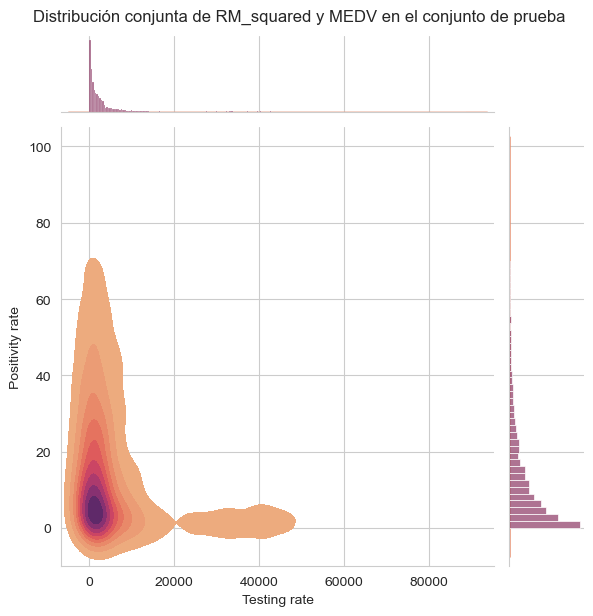

In [46]:
# Jointgrid amb histograma marginal Testing_rate x positivity_rate
g = sns.jointplot(data=df_datos4, x='testing_rate', y='positivity_rate', kind="kde", cmap="flare", fill=True)
g.plot_joint(sns.kdeplot, cmap="flare", fill=True)
g.plot_marginals(sns.histplot, color='#93446E')

# Configurar etiquetes i títol
g.set_axis_labels("Testing rate", "Positivity rate")
g.fig.suptitle("Distribución conjunta de RM_squared y MEDV en el conjunto de prueba", y=1.02)

plt.show()

#### Conteo de representación de regiones

In [ ]:
# Calcular el conteo de registros por región
region_counts = df_datos4['iso3'].value_counts()

# Crear la visualización del conteo de registros por región
plt.figure(figsize=(12, 6))  # Ajustar el tamaño de la figura
sns.countplot(data=df_datos4, x='iso3', palette='flare', order=region_counts.index)
plt.xlabel('Región')
plt.ylabel('Contador')
plt.title('Representación de cada región en el dataset')
plt.xticks(rotation=90)  # Rotar las etiquetas de las regiones
plt.tight_layout()  # Ajustar el espaciado
plt.show()

In [48]:
# Correlación entre región y nuevos casos
df_datos4['region_numeric'] = pd.factorize(df_datos4['region_name'])[0]
correlation = df_datos4['new_cases'].corr(df_datos4['region_numeric'], method='spearman')
print("Coeficiente de correlación de Spearman:", correlation)

Coeficiente de correlación de Spearman: -0.06648810188720043


Por tanto hablaríamos de una correlación negativa muy debil entre new_cases y region_name

## Heatmap de correlaciones

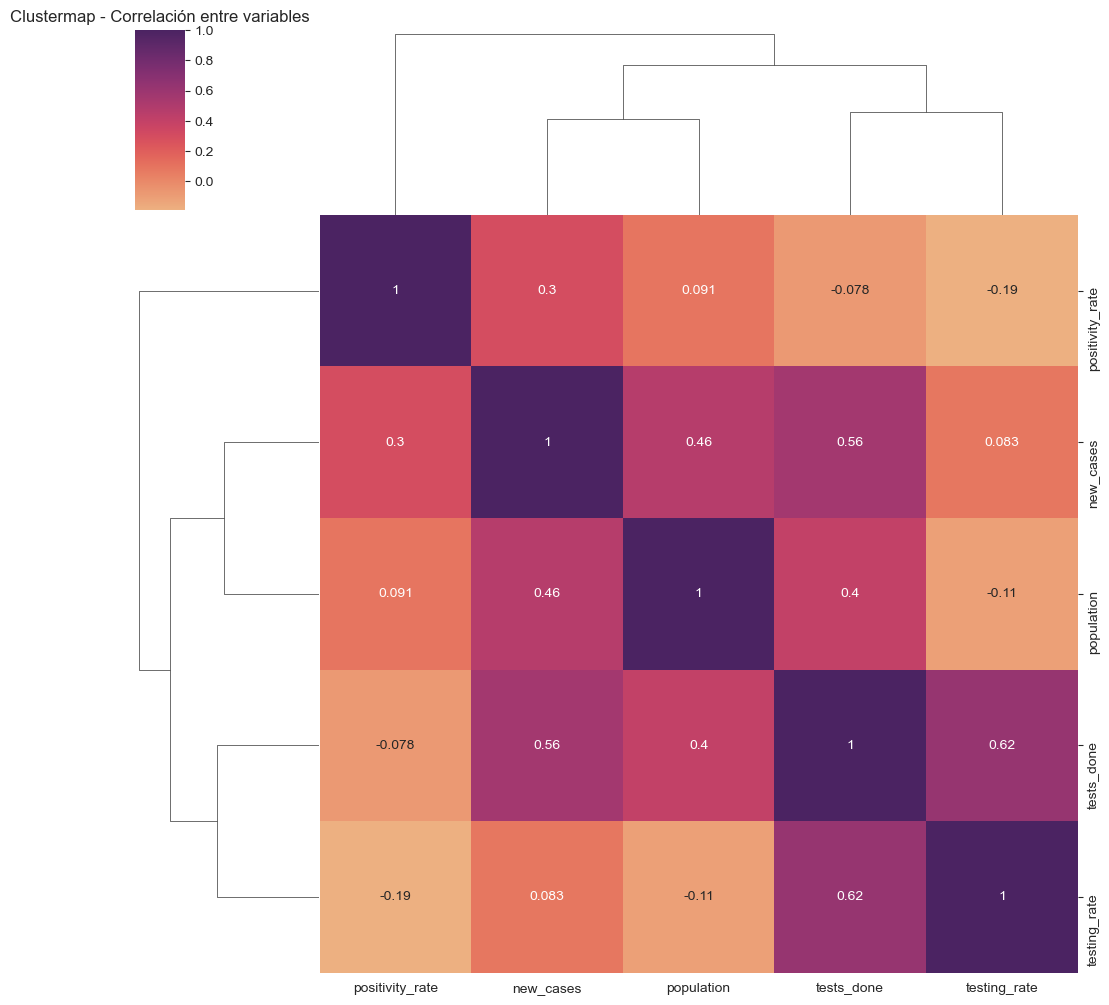

In [49]:
data = df_datos4[['new_cases', 'tests_done', 'population', 'testing_rate', 'positivity_rate']]
sns.clustermap(data.corr(), annot=True, cmap='flare')
plt.title('Clustermap - Correlación entre variables')
plt.show()

## Y por último exportamos

    Hacemos una función para poder guardarlo directamente en nuestra ubicación actual

In [50]:
import os 

def guardar_como_csv(df, nombre_archivo):
    # Obtener la ruta completa del directorio actual
    current_directory = os.getcwd()
    # Definir la ubicación y el nombre del archivo CSV
    file_path = os.path.join(current_directory, nombre_archivo)
    # Guardar el DataFrame como un archivo CSV en la ubicación especificada
    df.to_csv(file_path, index=False)

In [ ]:
# Llamar a la función para guardar el DataFrame df_datos4 como un archivo CSV
guardar_como_csv(df_datos4, "DEFMODTestingCovid19.csv")

In [ ]:
ls